## Data Sanity Check

### Objective

This notebook validates the data loading and preprocessing pipeline defined in
`src/data.py`. The goal is to verify that images and labels are loaded correctly,
shapes are consistent, and the binary class definition behaves as expected.

No models are trained in this notebook.

In [1]:
import sys
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt 

## Import Data Loader

The dataset is loaded exclusively through the public interface defined in
`data.py`. No direct access to the filesystem is performed here.

In [2]:
PROJECT_ROOT = Path("..")
sys.path.insert(0, str(PROJECT_ROOT))

from src.data import load_train_test

## Load Train and Test Splits

Both splits are loaded using the same preprocessing pipeline to ensure
consistency between training and evaluation data.

In [3]:
DATA_DIR = PROJECT_ROOT / "data"

X_train, y_train, X_test, y_test = load_train_test(DATA_DIR)

## Shape and Type Validation

We verify that data arrays have the expected shapes, data types, and value
ranges.

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((28709, 48, 48), (28709,), (7178, 48, 48), (7178,))

In [5]:
X_train.dtype, y_train.dtype

(dtype('float32'), dtype('int64'))

In [6]:
X_train.min(), X_train.max()

(np.float32(0.0), np.float32(1.0))

## Label Distribution

The distribution of binary labels is inspected to confirm correct class
mapping and to quantify class imbalance.

In [7]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{np.int64(0): np.int64(21494), np.int64(1): np.int64(7215)}

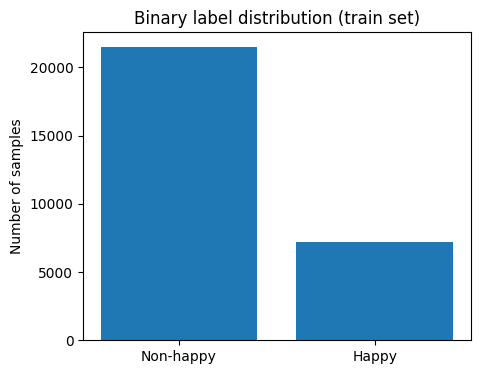

In [8]:
plt.figure(figsize=(5, 4))
plt.bar(["Non-happy", "Happy"], counts)
plt.ylabel("Number of samples")
plt.title("Binary label distribution (train set)")
plt.show()

## Single Sample Inspection

A single training sample is visualized together with its label to confirm
that image content and annotation are consistent.

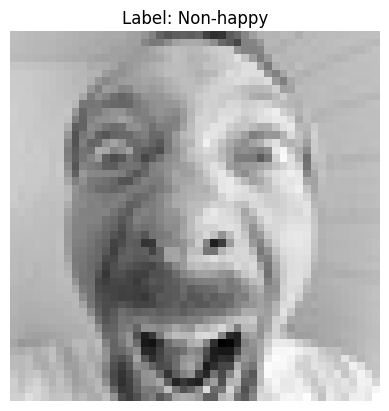

In [9]:
idx = 0
sample_image = X_train[idx]
sample_label = y_train[idx]

plt.imshow(sample_image, cmap="gray")
plt.title(f"Label: {'Happy' if sample_label == 1 else 'Non-happy'}")
plt.axis("off")
plt.show()

## Stop Condition

The data loading pipeline is verified. Images are correctly normalized,
labels follow the intended binary definition, and the dataset is ready for
baseline modeling.